## Real Estate Company Price Predictor


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))

## Train-Test Data Splitting

In [10]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    print(shuffle)
    test_set_size=int(len(data)*test_ratio)
    test_indices= shuffle[:test_set_size]
    train_indices= shuffle[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [11]:
# test_set, train_set=split_train_test(housing, 0.2)

In [12]:
# print(f'length of test set:{len(test_set)}\nlength of train set:{len(train_set)}\n')

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f'length of test set:{len(test_set)}\nlength of train set:{len(train_set)}\n')

length of test set:102
length of train set:404



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
housing=strat_train_set.copy()

## Looking For Correlations

In [18]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel=

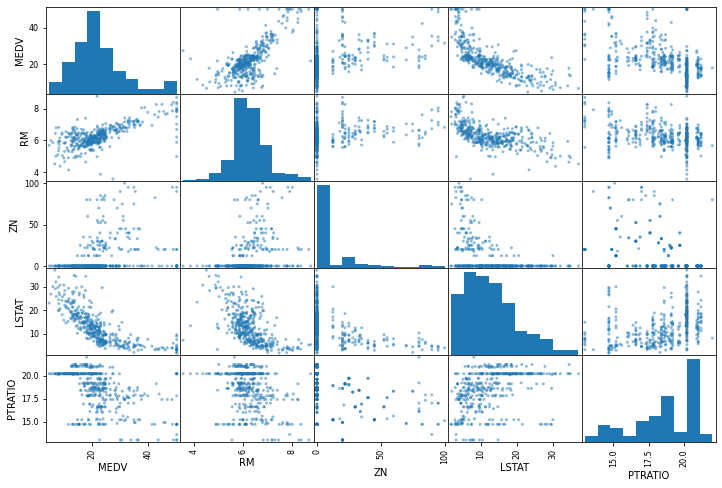

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT','PTRATIO']
scatter_matrix(housing[attributes], figsize= (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

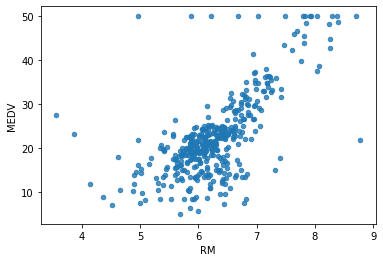

In [20]:
housing.plot(kind='scatter', x='RM', y= 'MEDV', alpha=0.8)

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

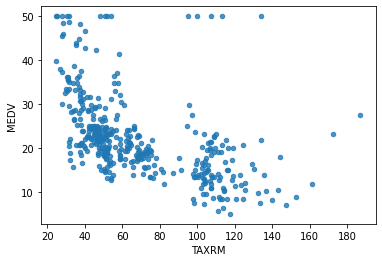

In [24]:
housing.plot(kind='scatter',x='TAXRM', y='MEDV', alpha=0.8)

In [25]:
housing=strat_train_set.drop('MEDV', axis=1)
housing_label= strat_train_set['MEDV'].copy()

## Missing Attributes

In [26]:
# To take care of missing attributes we have three options
# 1 Get rid of missing data points
# 2 Get rid of whole attribute
# 3 Replace the missing data with(zero, mean or median)

In [27]:
a=housing.dropna(subset=['RM']) # opt 1
a.shape

(404, 13)

In [28]:
housing.drop('RM', axis=1) #opt 2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [29]:
median= housing['RM'].median()  # compute median for option 3

In [30]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy= 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X= imputer.transform(housing)

In [35]:
housing_tr= pd.DataFrame(X, columns=housing.columns)


In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

primarily, three type of objects
1. estimators- estimates some parameters based on dataset Eg. imputer
it has a fit method and transform method
fit method- fits the dataset and calculates internal parameter

2. transformers- this method takes input and returns output based on learning from fit(). Also has a convineance function called  fit_transform().

3. predictors-eg. Linear regression .fit() and .predicts() are two common functions.It also gives score() function which will evalute the predictions.


## Feature Scaling

primarily, two types
1. min-max scaling (Normalization)
   (value-min)/(max-min)
   sklearn provides MinmaxScaler for this
   
2. standardization
   (value-mean)/(std)
   slearn provides StandardScaler for this

## Creating Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # can add more lines
    ('std_scaler', StandardScaler()),
])

In [38]:
housing_num_tr= my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr.shape


(404, 13)

## selecting a desired model for Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()
#model = DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [41]:
some_data= housing.iloc[:5]

In [42]:
some_label= housing_label.iloc[:5]

In [43]:
prepared_data=my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.247, 25.079, 16.53 , 23.284, 23.494])

In [45]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse= mean_squared_error(housing_label, housing_predictions)
rmse= np.sqrt(mse)

In [47]:
rmse

1.2832541217892535

## using better evaluation technique- cross validation

In [48]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_label, scoring='neg_mean_squared_error',cv=10)
rmse_score= np.sqrt(-score)

In [49]:
list(rmse_score)

[2.8586823461338864,
 2.794714122122378,
 4.41545847963333,
 2.5447742963791904,
 3.3762027856750567,
 2.602997080290335,
 4.5815484091079925,
 3.354863905585438,
 3.076427859547497,
 3.2285136363348386]

In [50]:
def print_scores(score):
    print('score:', score)
    print('mean:', score.mean())
    print('std:', score.std())

In [51]:
 print_scores(rmse_score)

score: [2.85868235 2.79471412 4.41545848 2.5447743  3.37620279 2.60299708
 4.58154841 3.35486391 3.07642786 3.22851364]
mean: 3.283418292080994
std: 0.6673852075559599


In [52]:
from joblib import dump, load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [58]:
X_test= strat_test_set.drop('MEDV', axis=1)
Y_test= strat_test_set['MEDV'].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test, final_predictions)
final_rmse= np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.975 11.877 25.27  22.055 18.58  14.838 19.596 14.564 31.717 41.53
 19.426 11.997 24.559 26.673 19.493 11.203 31.474 14.219 23.492 18.668
 19.989 17.165 16.098 22.011 19.066 31.529 16.338 32.954  9.113 33.184
 24.562 21.345 23.522 11.112 20.779 11.467 42.824 24.446 23.102 42.518
 23.727 29.159 20.451 21.205 18.814 32.86  44.9   20.106 20.189 21.962
 21.134 14.107 21.081 15.034 24.905 32.993 41.096 29.465 19.28  20.928
 46.377 10.245 19.079 25.466 14.762 32.528 19.835 18.151 19.122 34.019
 27.001 23.233 21.462 22.219 34.817 13.083 16.025 20.032 20.656 21.596
 22.692 21.087 13.614 23.364 20.722 21.42  14.157 21.509 21.72  23.045
 18.506 27.045  7.393 26.612 18.668 28.632 20.059 30.922 14.4   27.548
 21.594 20.191] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [56]:
final_rmse

2.9562101997486634

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model

In [61]:
from joblib import dump, load
import numpy as np
model= load('Dragon.joblib')
features= np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.247])